<a href="https://colab.research.google.com/github/AdityaGogoi/Fast-AI-Deep-Learning/blob/master/Lesson3_Planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi-label prediction with Planet Amazon dataset

In [101]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

## Getting the data

The planet dataset isn't available on the [fastai dataset page](https://course.fast.ai/datasets) due to copyright restrictions. You can download it from Kaggle however. Let's see how to do this by using the [Kaggle API](https://github.com/Kaggle/kaggle-api) as it's going to be pretty useful to you if you want to join a competition or use other Kaggle datasets later on.

First, install the Kaggle API by uncommenting the following line and executing it, or by executing it in your terminal (depending on your platform you may need to modify this slightly to either add `source activate fastai` or similar, or prefix `pip` with a path. Have a look at how `conda install` is called for your platform in the appropriate *Returning to work* section of https://course.fast.ai/. (Depending on your environment, you may also need to append "--user" to the command.)

In [4]:
! {sys.executable} -m pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.4)


Then you need to upload your credentials from Kaggle on your instance. Login to kaggle and click on your profile picture on the top left corner, then 'My account'. Scroll down until you find a button named 'Create New API Token' and click on it. This will trigger the download of a file named 'kaggle.json'.

Upload this file to the directory this notebook is running in, by clicking "Upload" on your main Jupyter page, then uncomment and execute the next two commands (or run them in a terminal). For Windows, uncomment the last two commands.

I was facing **issues** when trying to **load kaggle.json** using the **original steps** in the Notebook, as I was using **Google Colab**.

So, I commented those steps and used the **steps mentioned** in this [Colab Notebook](https://colab.research.google.com/drive/1DofKEdQYaXmDWBzuResXWWvxhLgDeVyl), as it is **specific** to including **kaggle API in Colab**.

In [16]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityagogoi1991","key":"fe35e582bbf453f918e3f28aeeb7ffa3"}'}

In [17]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 71 Jul 14 17:13 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [104]:
# List available datasets.
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
matheusfreitag/gas-prices-in-brazil                         Gas Prices in Brazil                                  3MB  2019-07-12 16:23:52           1373  
new-york-city/new-york-city-current-job-postings            New York City Current Job Postings                    3MB  2019-07-07 22:05:59           2730  
sudalairajkumar/chennai-water-management                    Chennai Water Management                             75KB  2019-06-19 03:42:44           1935  
r3w0p4/bournemouth-venues                                   Venues in Bournemouth                                 3KB  2019-07-08 14:26:48            229  
jealousleopard/goodreadsbooks                               Good

In [15]:
# ! mkdir -p ~/.kaggle/
# ! pwd
# ! mv kaggle_file ~/.kaggle/

# For Windows, uncomment these two commands
# ! mkdir %userprofile%\.kaggle
# ! move kaggle.json %userprofile%\.kaggle

/content


You're all set to download the data from [planet competition](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space). You **first need to go to its main page and accept its rules**, and run the two cells below (uncomment the shell commands to download and unzip the data). If you get a `403 forbidden` error it means you haven't accepted the competition rules yet (you have to go to the competition page, click on *Rules* tab, and then scroll to the bottom to find the *accept* button).

In [21]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

In [22]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
train_folder = 'train'
test_folder = 'test'

In [0]:
path = Path(base_dir + 'data/planet')

In [0]:
dest_train = path/train_folder
dest_train.mkdir(parents=True, exist_ok=True)

In [0]:
dest_test = path/test_folder
dest_test.mkdir(parents=True, exist_ok=True)

In [43]:
!kaggle competitions list -s planet

ref                                         deadline             category   reward  teamCount  userHasEntered  
------------------------------------------  -------------------  --------  -------  ---------  --------------  
planet-understanding-the-amazon-from-space  2017-07-20 23:59:00  Featured  $60,000        938            True  


In [49]:
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p dest_train --force
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p dest_train --force
! unzip -q -n dest_train/train_v2.csv.zip -d dest_train

100% 598M/600M [00:03<00:00, 177MB/s]
100% 600M/600M [00:03<00:00, 177MB/s]
  0% 0.00/159k [00:00<?, ?B/s]
100% 159k/159k [00:00<00:00, 58.0MB/s]


In [46]:
dest_train

PosixPath('/content/gdrive/My Drive/fastai-v3/data/planet/train')

In [52]:
!mkdir ~/data
!cd ~/data
!mkdir planet
!cd planet
!pwd

mkdir: cannot create directory ‘/root/data’: File exists
mkdir: cannot create directory ‘planet’: File exists
/content


In [61]:
!mkdir ~/data/planet/train
!mkdir ~/data/planet/test
!ls ~/data/planet

test  train  train_v2.csv.zip


In [62]:
!kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p ~/data/planet/train
!kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv.zip -p ~/data/planet/train
!kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg.tar.7z -p ~/data/planet/test

 99% 595M/600M [00:03<00:00, 200MB/s]
100% 600M/600M [00:03<00:00, 185MB/s]
  0% 0.00/159k [00:00<?, ?B/s]
100% 159k/159k [00:00<00:00, 51.6MB/s]
 99% 596M/603M [00:13<00:00, 46.2MB/s]
100% 603M/603M [00:13<00:00, 46.5MB/s]


To extract the content of this file, we'll need 7zip, so uncomment the following line if you need to install it (or run `sudo apt install p7zip-full` in your terminal).

In [55]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


And now we can unpack the data (uncomment to run - this might take a few minutes to complete).

In [64]:
!p7zip -d ~/data/planet/train/train-jpg.tar.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /root/data/planet/train/                                  1 file, 629296207 bytes (601 MiB)

Extracting archive: /root/data/planet/train/train-jpg.tar.7z
--
Path = /root/data/planet/train/train-jpg.tar.7z
Type = 7z
Physical Size = 629296207
Headers Size = 98
Method = LZMA2:24
Solid = -
Blocks = 1

  0%    
Would you like to replace the existing file:
  Path:     ./train-jpg.tar
  Size:     665753600 bytes (635 MiB)
  Modified: 2017-04-19 21:59:23
with the file from archive:
  Path:     train-jpg.tar
  Size:     665753600 bytes (635 MiB)
  Modified: 2017-04-19 21:59:23
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? Y

  0% - train-jpg.tar

In [78]:
! tar -xvf train-jpg.tar

train-jpg/
train-jpg/train_21777.jpg
train-jpg/train_34567.jpg
train-jpg/train_7212.jpg
train-jpg/train_11485.jpg
train-jpg/train_14111.jpg
train-jpg/train_8634.jpg
train-jpg/train_27649.jpg
train-jpg/train_8459.jpg
train-jpg/train_12520.jpg
train-jpg/train_25962.jpg
train-jpg/train_14764.jpg
train-jpg/train_17626.jpg
train-jpg/train_25677.jpg
train-jpg/train_9660.jpg
train-jpg/train_1366.jpg
train-jpg/train_26122.jpg
train-jpg/train_24548.jpg
train-jpg/train_17415.jpg
train-jpg/train_25901.jpg
train-jpg/train_23389.jpg
train-jpg/train_25095.jpg
train-jpg/train_12922.jpg
train-jpg/train_19885.jpg
train-jpg/train_37550.jpg
train-jpg/train_21305.jpg
train-jpg/train_40436.jpg
train-jpg/train_31247.jpg
train-jpg/train_1837.jpg
train-jpg/train_6289.jpg
train-jpg/train_36691.jpg
train-jpg/train_16062.jpg
train-jpg/train_28673.jpg
train-jpg/train_22394.jpg
train-jpg/train_14346.jpg
train-jpg/train_13177.jpg
train-jpg/train_12481.jpg
train-jpg/train_3923.jpg
train-jpg/train_36787.jpg
train-jpg

In [0]:
! mv train-jpg ~/data/planet/train/.

In [96]:
! ls -lrt ~/data/planet/train

total 1516
drwxrwxr-x 2 1003 1004 1388544 Apr 19  2017 train-jpg
-rw-r--r-- 1 root root  162930 Jul 14 18:08 train_v2.csv.zip


In [97]:
!unzip ~/data/planet/train/train_v2.csv.zip -d ~/data/planet/train

Archive:  /root/data/planet/train/train_v2.csv.zip
  inflating: /root/data/planet/train/train_v2.csv  
   creating: /root/data/planet/train/__MACOSX/
  inflating: /root/data/planet/train/__MACOSX/._train_v2.csv  


In [132]:
! ls -lrt ~/data/planet/train/

total 2756
drwxrwxr-x 2 1003 1004 1388544 Apr 19  2017 train-jpg
-rw-r--r-- 1 root root 1432177 May  9  2017 train_v2.csv


## Multiclassification

Contrary to the pets dataset studied in last lesson, here each picture can have multiple labels. If we take a look at the csv file containing the labels (in 'train_v2.csv' here) we see that each 'image_name' is associated to several tags separated by spaces.

In [133]:
df = pd.read_csv('/root/data/planet/train/train_v2.csv')
df.head()

image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road

To put this in a `DataBunch` while using the [data block API](https://docs.fast.ai/data_block.html), we then need to using `ImageList` (and not `ImageDataBunch`). This will make sure the model created has the proper loss function to deal with the multiple classes.

In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

We use parentheses around the data block pipeline below, so that we can use a multiline statement without needing to add '\\'.

In [0]:
np.random.seed(42)
src = (ImageList.from_csv('/root/data/planet/train/', 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

`show_batch` still works, and show us the different labels separated by `;`.

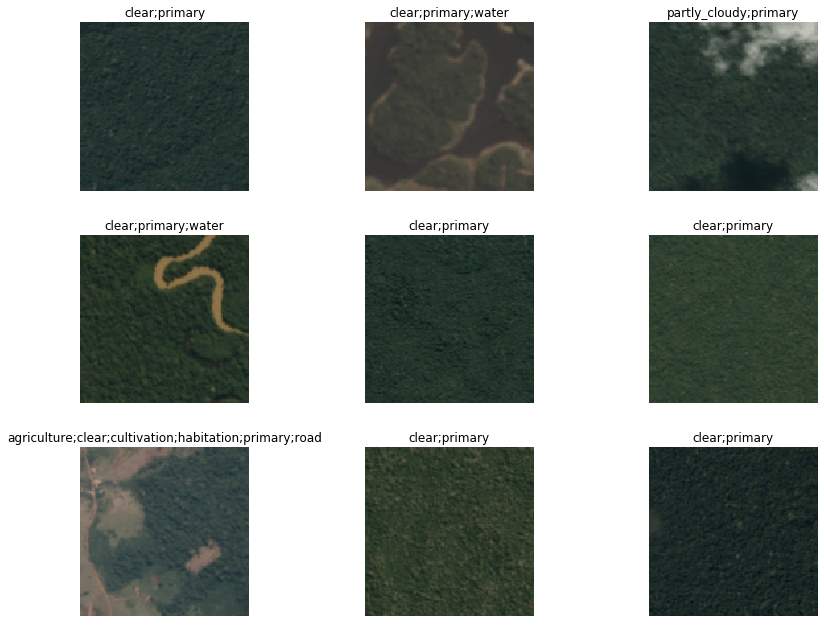

In [137]:
data.show_batch(rows=3, figsize=(12,9))

To create a `Learner` we use the same function as in lesson 1. Our base architecture is resnet50 again, but the metrics are a little bit differeent: we use `accuracy_thresh` instead of `accuracy`. In lesson 1, we determined the predicition for a given class by picking the final activation that was the biggest, but here, each activation can be 0. or 1. `accuracy_thresh` selects the ones that are above a certain threshold (0.5 by default) and compares them to the ground truth.

As for Fbeta, it's the metric that was used by Kaggle on this competition. See [here](https://en.wikipedia.org/wiki/F1_score) for more details.

In [0]:
arch = models.resnet50

In [139]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 80690935.47it/s]


We use the LR Finder to pick a good learning rate.

In [140]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


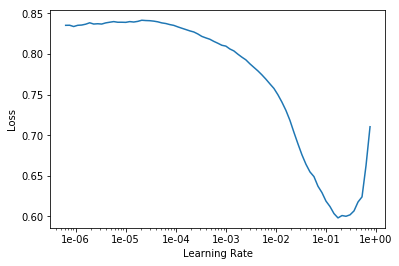

In [141]:
learn.recorder.plot()

Then we can fit the head of our network.

In [0]:
lr = 0.01

In [143]:
learn.fit_one_cycle(5, slice(lr))

In [0]:
learn.save('stage-1-rn50')

...And fine-tune the whole model:

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


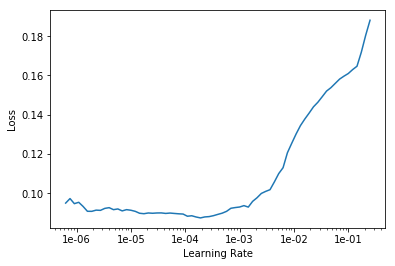

In [146]:
learn.lr_find()
learn.recorder.plot()

In [147]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

In [0]:
learn.save('stage-2-rn50')

In [149]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


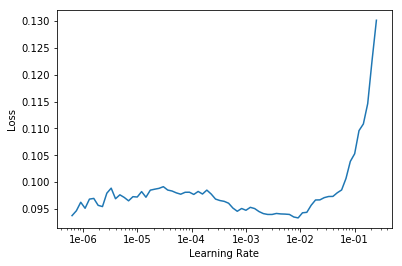

In [151]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=1e-2/2

In [153]:
learn.fit_one_cycle(5, slice(lr))

In [0]:
learn.save('stage-1-256-rn50')

In [0]:
learn.unfreeze()

In [156]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

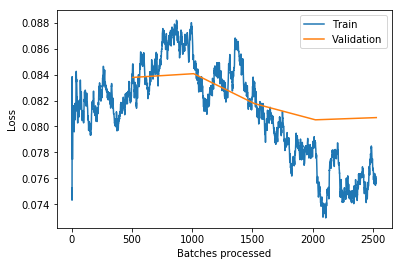

In [157]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2-256-rn50')

You won't really know how you're going until you submit to Kaggle, since the leaderboard isn't using the same subset as we have for training. But as a guide, 50th place (out of 938 teams) on the private leaderboard was a score of `0.930`.

> **NOTE** - Exporting this as a specific **.pkl** file so that it can be used later on the **Part - 2** of this Course.

In [0]:
! mkdir /root/learners/planet

In [0]:
learn.export('/root/learners/planet/export.pkl')

In [190]:
! ls -lrt /root/learners/planet

total 100448
-rw-r--r-- 1 root root 102854932 Jul 15 00:27 export.pkl


Since the **Kaggle Submission** will be taken care of in **Part 2**, I will **not** run those cells in this week's work.

But to see how my Model works against **similar data**, I will use **Satellite Images** of other rivers from **India** and find out how the Model classifies the terrain as.

The **first step** would be to get all the images I want to classify under a **common dataset**.

This dataset will be used to see **how well** the Model does against **new images**.

In [160]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
path = Path(base_dir + 'data/planet')
validation_folder = 'validation'
dest_validation = path/validation_folder
dest_validation.mkdir(parents=True, exist_ok=True)

In [162]:
dest_validation.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/planet/validation/AmazonBasin_2.png'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/planet/validation/AmazonBasin_1.png'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/planet/validation/BrahmaputraBasin_1.png'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/planet/validation/GangaBasin_1.png'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/planet/validation/BrahmaputraBasin_2.png')]

In [163]:
validation_set = ImageList.from_folder(dest_validation)
len(validation_set)

5

We have included satellite images from **3 rivers**:
1. **Amazon** - 2 images
2. **Brahmaputra** - 2 images
3. **Gange** - 1 image

We have included a collective image of all the rivers we have included in our validation set.

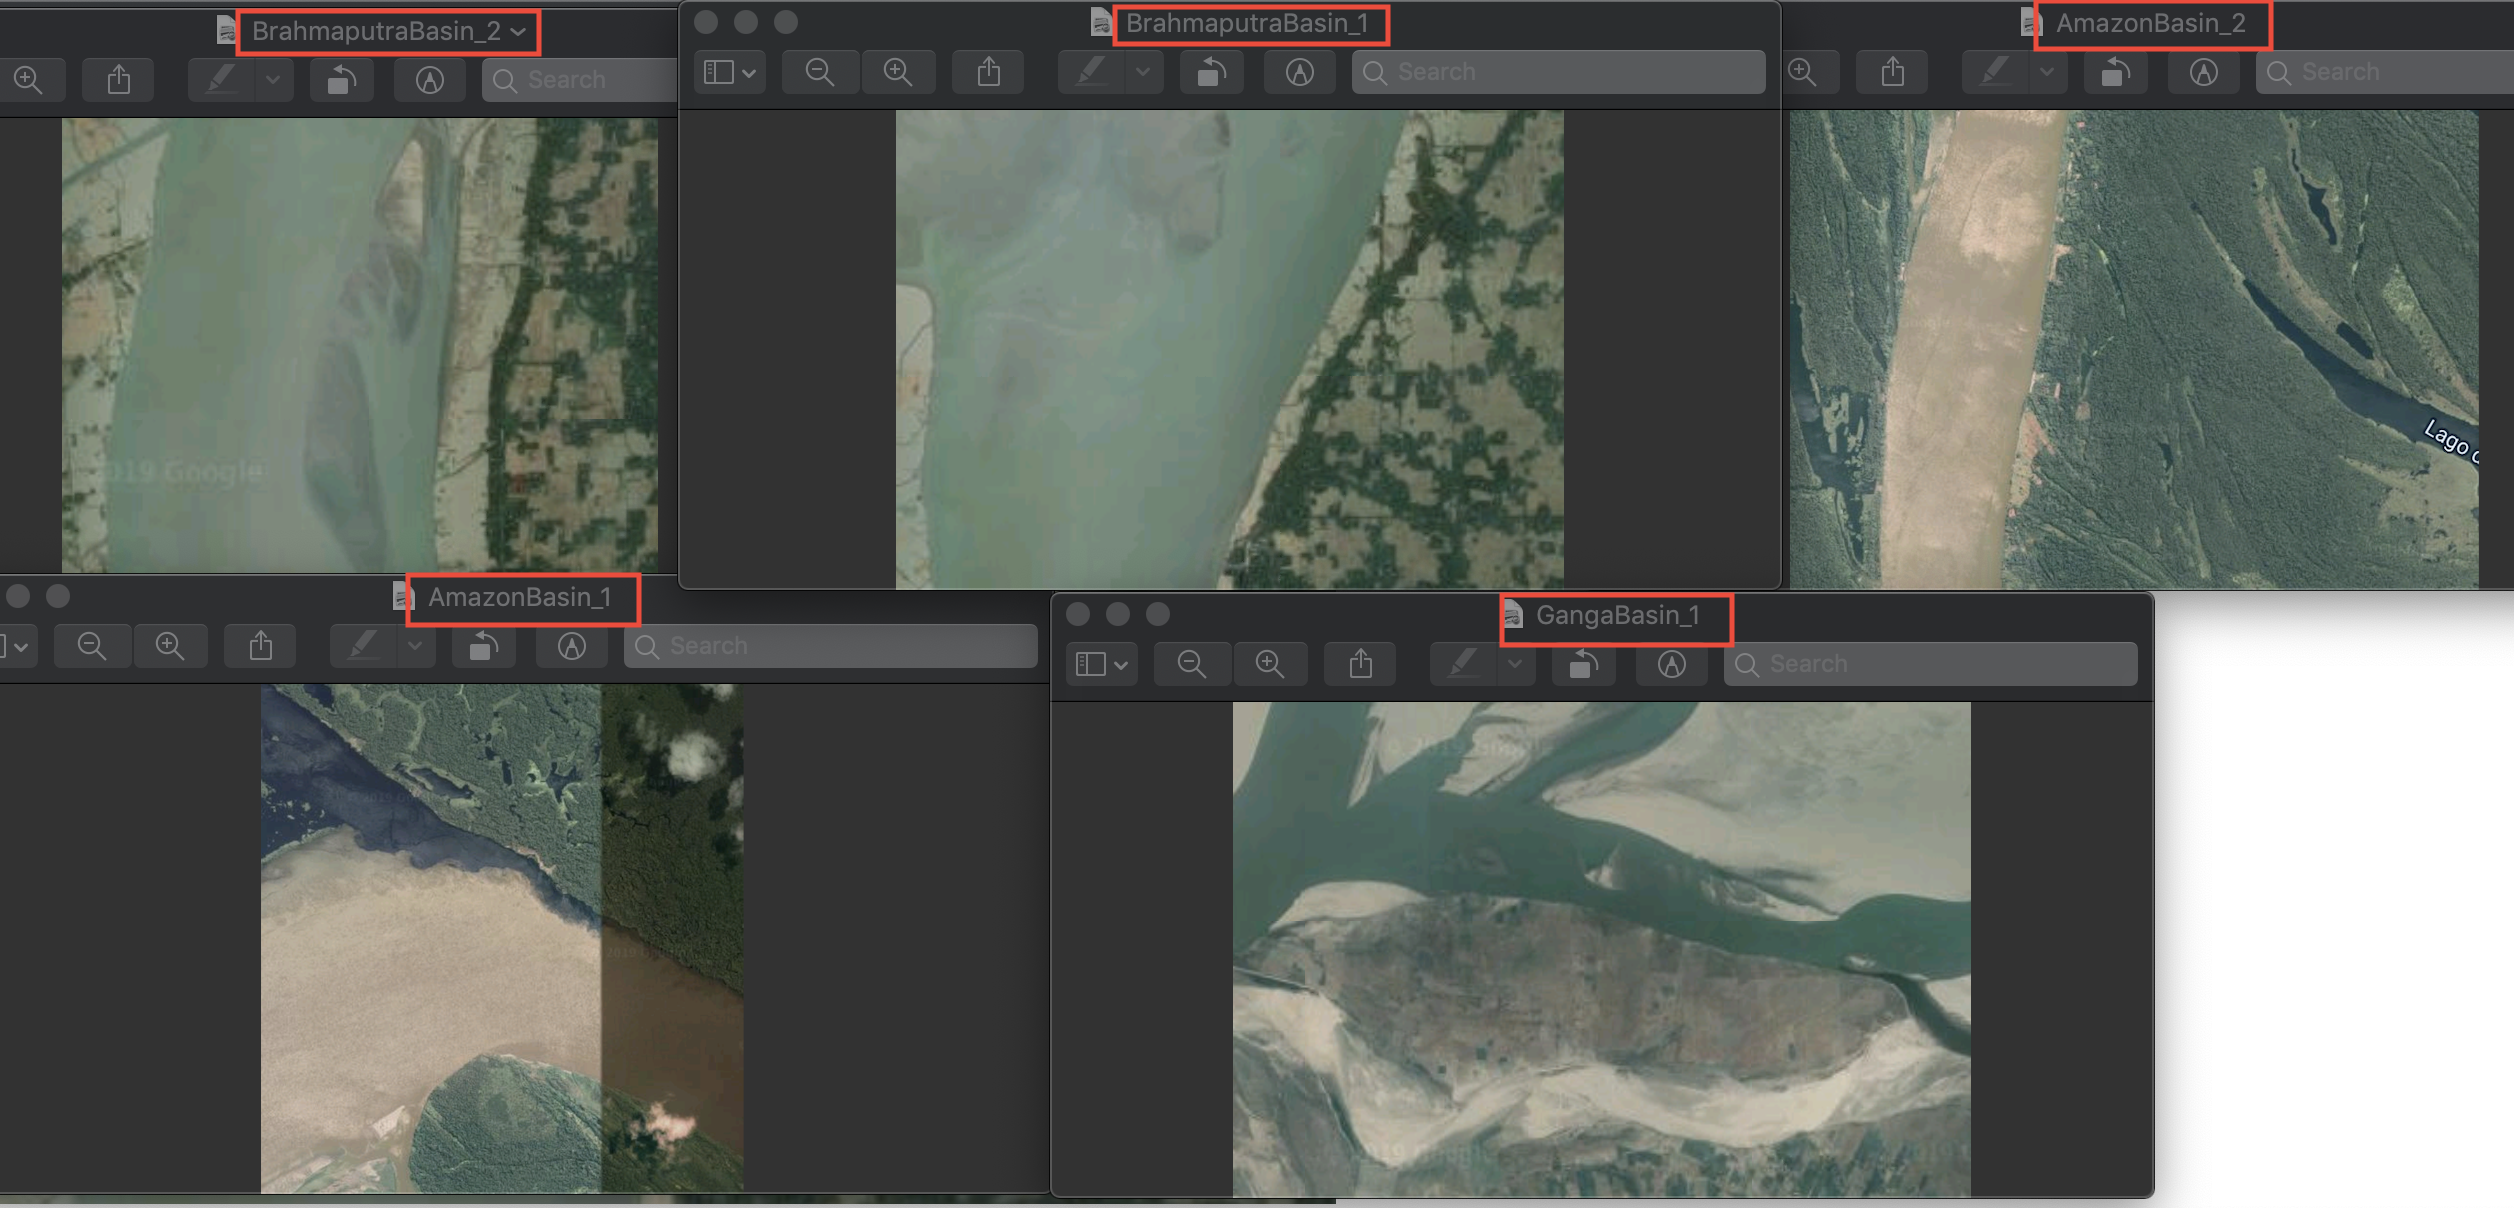

In [200]:
All_Rivers = open_image(path/'All_River_Images.png')
All_Rivers

In [0]:
learn = load_learner('/root/learners/planet', test=validation_set)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [0]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]
validation_result = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])

In [195]:
validation_result

image_name                                  tags
0       AmazonBasin_2  agriculture clear primary road water
1       AmazonBasin_1       agriculture clear primary water
2  BrahmaputraBasin_1  agriculture clear haze primary water
3        GangaBasin_1       agriculture clear primary water
4  BrahmaputraBasin_2       agriculture clear primary water

Conclusions:

1. All the images have **common properties** like - **agriculture**, **primary (Primary Rain Forest)** and **water**. 

2. This is **definitely true** as all the **river basins** chosen for validation are known for their **surrounding dense forests** and that their **banks** are used for **farming**. 

3. The Model **might** be correct in identifying **road** in the **Amazon Basin Image 1**, which even I could **not identify** at a first glance.

## fin

(This section will be covered in part 2 - please don't ask about it just yet! :) )

In [0]:
#! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg.tar.7z -p {path}  
#! 7za -bd -y -so x {path}/test-jpg.tar.7z | tar xf - -C {path}
#! kaggle competitions download -c planet-understanding-the-amazon-from-space -f test-jpg-additional.tar.7z -p {path}  
#! 7za -bd -y -so x {path}/test-jpg-additional.tar.7z | tar xf - -C {path}

In [0]:
test = ImageList.from_folder(path/'test-jpg').add(ImageList.from_folder(path/'test-jpg-additional'))
len(test)

61191

In [0]:
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [0]:
labelled_preds[:5]

['agriculture cultivation partly_cloudy primary road',
 'clear haze primary water',
 'agriculture clear cultivation primary',
 'clear primary',
 'partly_cloudy primary']

In [0]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [0]:
df = pd.DataFrame({'image_name':fnames, 'tags':labelled_preds}, columns=['image_name', 'tags'])

In [0]:
df.to_csv(path/'submission.csv', index=False)

In [0]:
! kaggle competitions submit planet-understanding-the-amazon-from-space -f {path/'submission.csv'} -m "My submission"

100%|██████████████████████████████████████| 2.18M/2.18M [00:02<00:00, 1.05MB/s]
Successfully submitted to Planet: Understanding the Amazon from Space

Private Leaderboard score: 0.9296 (around 80th)